In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from pylab import rcParams
import matplotlib

pd.set_option('display.max_columns', None)
font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'grid.linewidth': 0.2,
          'font.size': 25,
          'legend.fontsize': 18,
          'legend.frameon': False,
          'xtick.labelsize': 30,
          'xtick.direction': 'out',
          'ytick.labelsize': 30,
          'ytick.direction': 'out',
          'legend.handlelength': 1,
          'legend.handleheight': 1,
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)
df = pd.read_csv('/tera11/zhwei/students/Xionghui/data/run/0p1/csv/Global_index.csv')
df

,Unnamed: 0,lat,lon,Sbedrock,Dbedrock_Frequency,P/Sbedrock_div_Sr,P/Sbedrock_div_ET_mean,P/Sbedrock_div_PR_mean,P/ET_mean_div_PR_mean,P/ET_mean_sub_Sbedrock_div_PR_mean,P/Q_mean_div_PR_mean,P/PET_div_PR_mean
0,1250334,-55.25,-66.55,4.320986,2.0,5.985394,0.817598,0.500058,61.161920,60.661860,38.838080,57.892887
1,1261124,-54.95,-67.55,2.827930,2.0,4.088032,0.606199,0.462993,76.376290,75.913300,23.623709,93.894150
2,1261139,-54.95,-66.05,92.192160,2.0,74.151410,17.186690,14.551907,84.669630,70.117720,15.330367,67.754265
3,1264742,-54.85,-65.75,39.953026,2.0,23.790121,6.959370,6.726510,96.654020,89.927510,3.345979,91.588110
4,1264743,-54.85,-65.65,32.279675,3.0,19.848242,5.747558,5.404394,94.029396,88.625000,5.970604,87.018654
...,...,...,...,...,...,...,...,...,...,...,...,...
169783,5910459,74.15,105.95,3.792372,2.0,6.000401,2.053551,1.149660,55.983997,54.834340,44.016003,83.972720
169784,5921289,74.45,108.95,59.713875,1.0,99.993760,30.480196,20.801900,68.247270,47.445366,31.752731,87.089900
169785,5928325,74.65,92.55,15.885224,2.0,35.394085,9.382636,3.808643,40.592464,36.783820,59.407536,58.741230
169786,5931949,74.75,94.95,56.937702,1.0,99.993270,31.237398,15.500167,49.620544,34.120377,50.379456,66.832540


In [28]:
df = df[df['Sbedrock'] > 0]

print(df["P/Sbedrock_div_Sr"].mean())
print(df["P/Sbedrock_div_ET_mean"].mean())
print(df["P/Sbedrock_div_PR_mean"].mean())
print(df["P/ET_mean_div_PR_mean"].mean())
print(df["P/ET_mean_sub_Sbedrock_div_PR_mean"].mean())
print(df["P/Q_mean_div_PR_mean"].mean())
print(df["P/PET_div_PR_mean"].mean())

49.03380262612428
15.914590236615735
11.589169170224666
70.19879387593352
58.60962469804757
29.801206127533995
155.38027904116603


In [29]:
df['Dbedrock_Frequency'] = df['Dbedrock_Frequency'].astype('int64')
n1 = len(df[df['Dbedrock_Frequency']==1])
n2 = len(df[df['Dbedrock_Frequency']==2])
n3 = len(df[df['Dbedrock_Frequency']==3])
print(n1,n2,n3)
n = [n1,n2,n3]

df['Dbedrock_Frequency'] = df['Dbedrock_Frequency'].astype(str)
df = df[df['Dbedrock_Frequency'] != '4']

df
# print(df['Dbedrock_Frequency'].describe())

size1 = 30
size2 = 24

df['Dbedrock_Frequency'] = pd.Categorical(df['Dbedrock_Frequency'], categories=["1", "2", "3"], ordered=True)

44183 123827 1773


/tmp/ipykernel_3217072/740447934.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x1478083fe7a0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

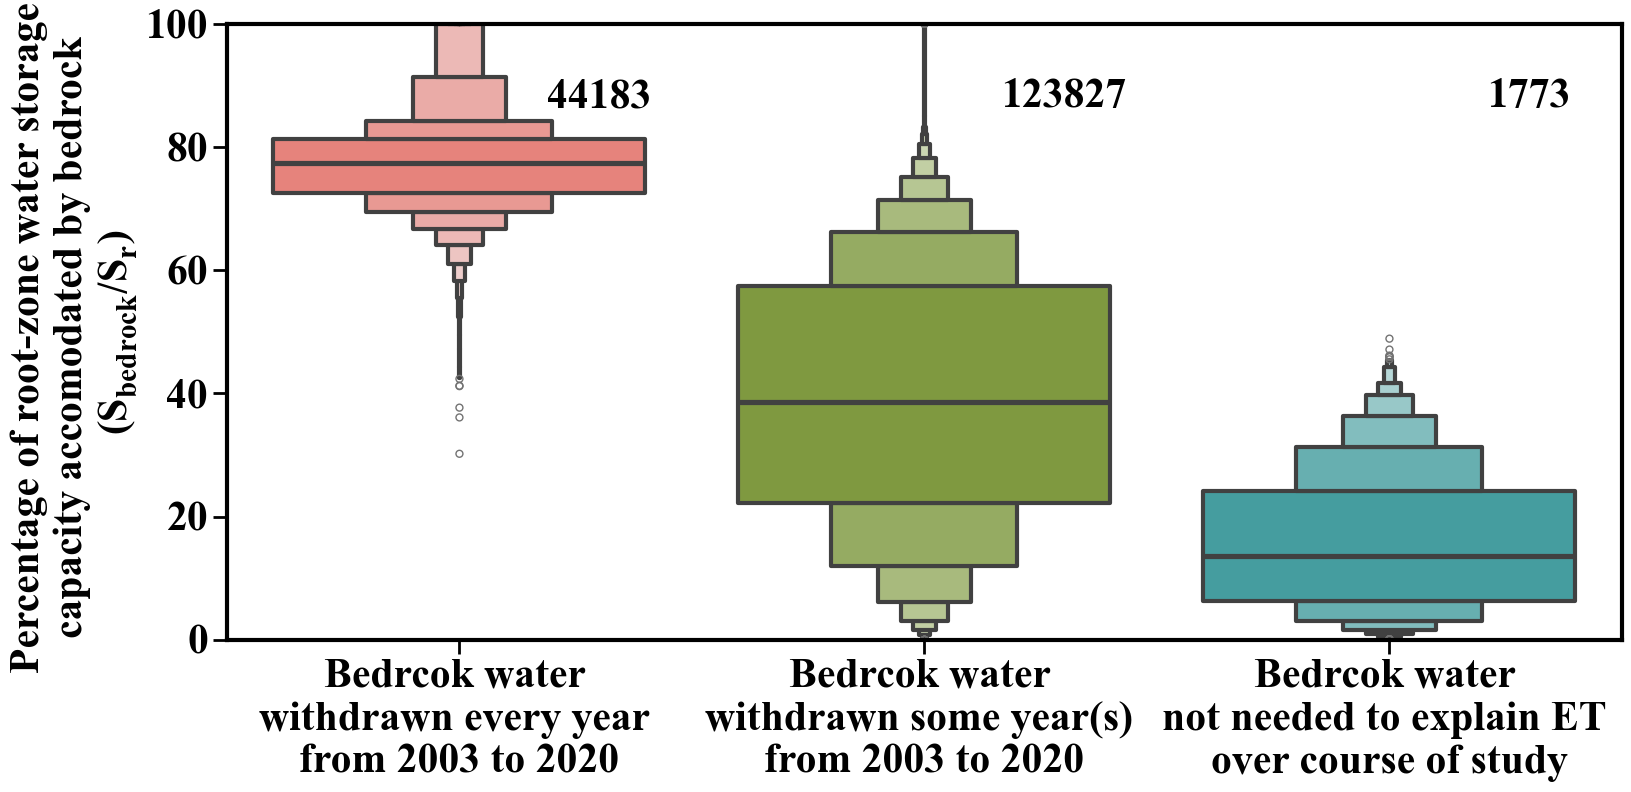

In [30]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/Sbedrock_div_Sr", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("Percentage of root-zone water storage \ncapacity accomodated by bedrock \n($S_{bedrock}$/$S_{r}$)", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks = np.arange(0, 120, 20)
plt.yticks(ticks=yticks, labels=yticks,fontsize=size1, fontweight='bold')

# fig.savefig('boxenplot2.pdf')

/tmp/ipykernel_3217072/3473341265.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x1478081264a0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

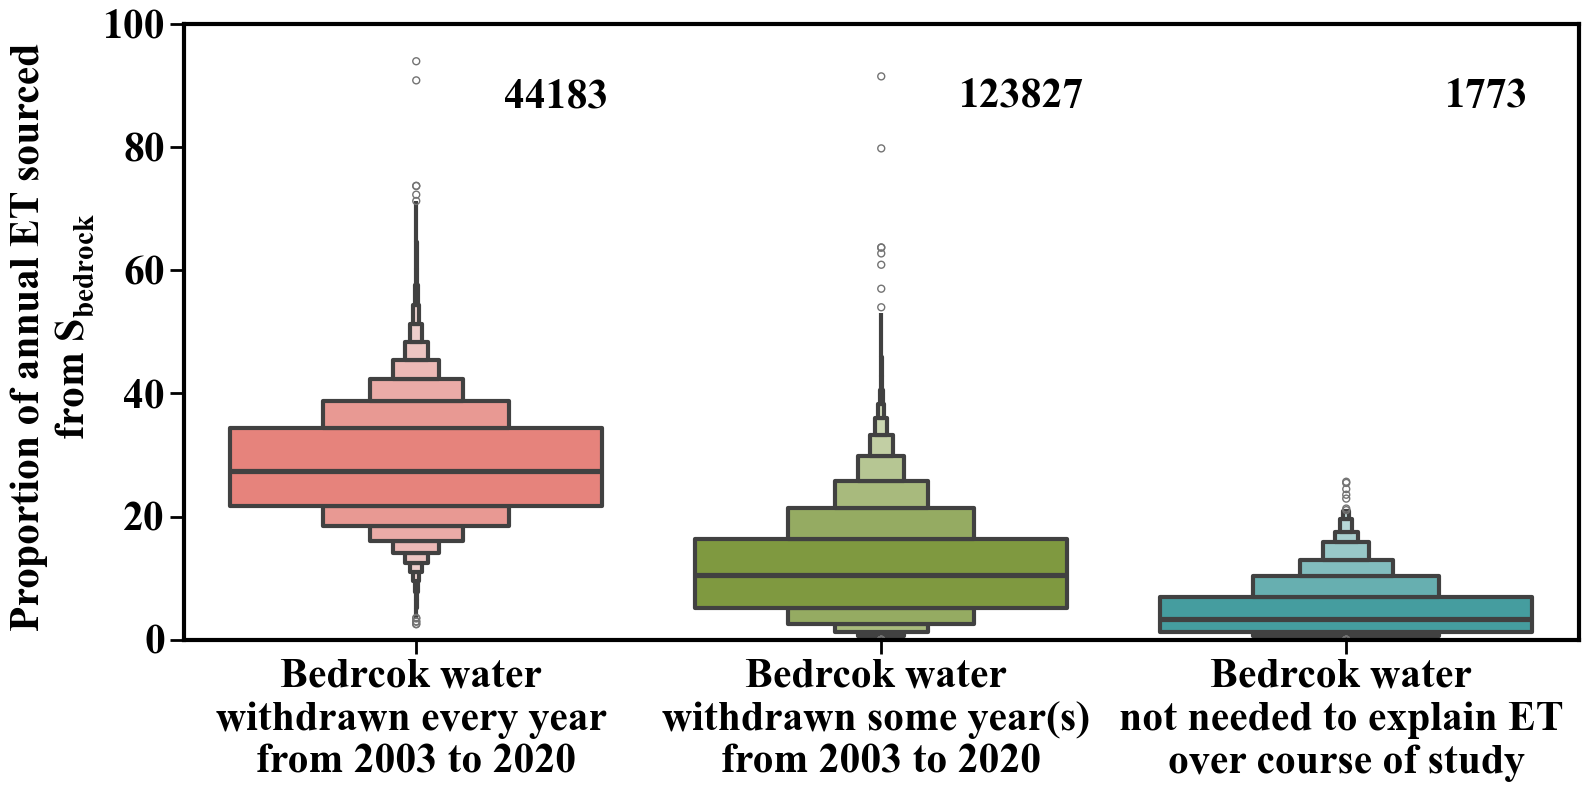

In [31]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/Sbedrock_div_ET_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("Proportion of annual ET sourced \n from $S_{bedrock}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

/tmp/ipykernel_3217072/372109739.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x14780367fdc0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

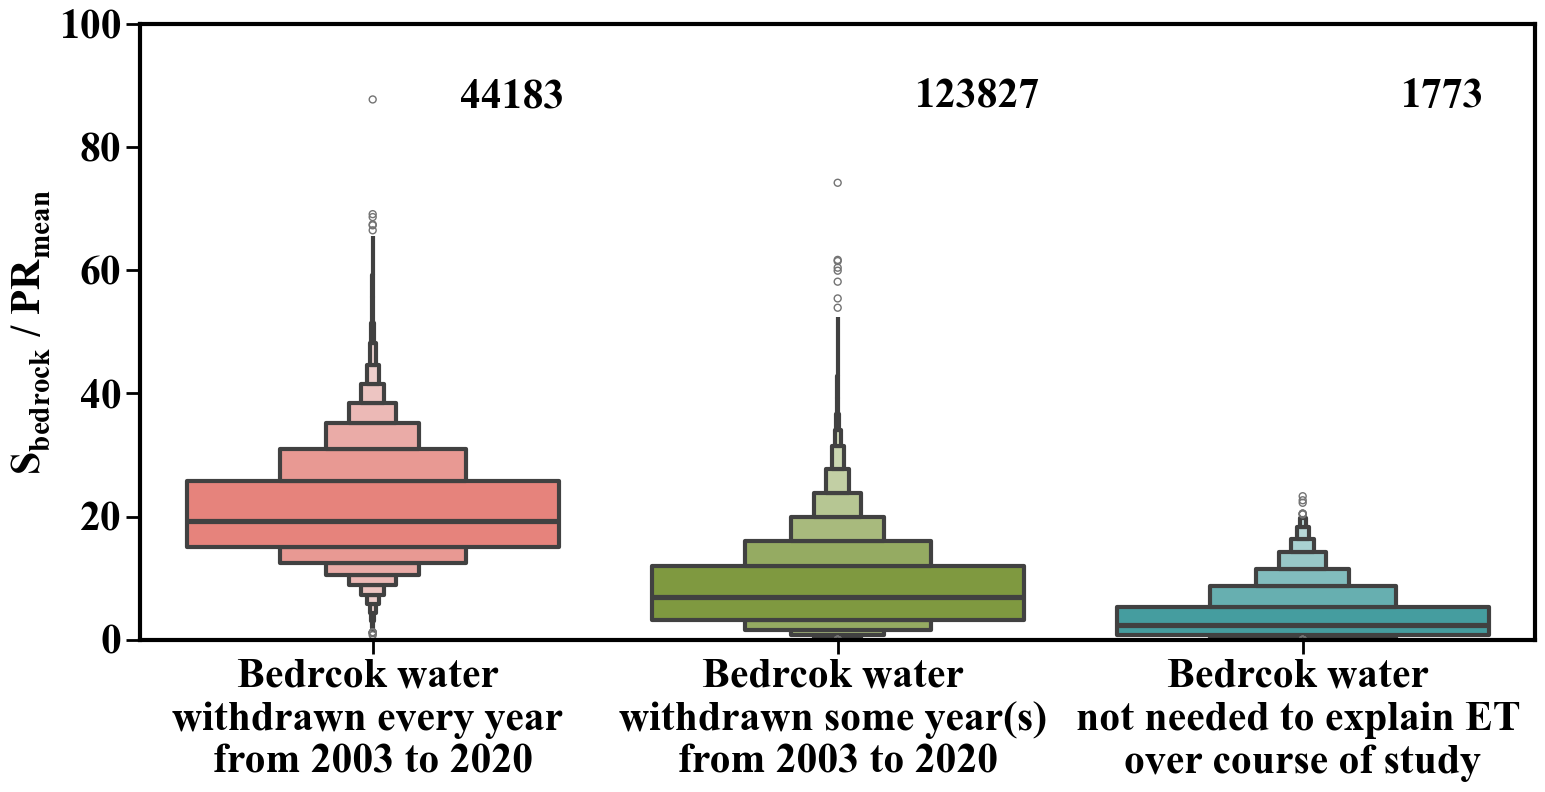

In [32]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/Sbedrock_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("$S_{bedrock}$ / $PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

/tmp/ipykernel_3217072/885527804.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x1478036915a0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

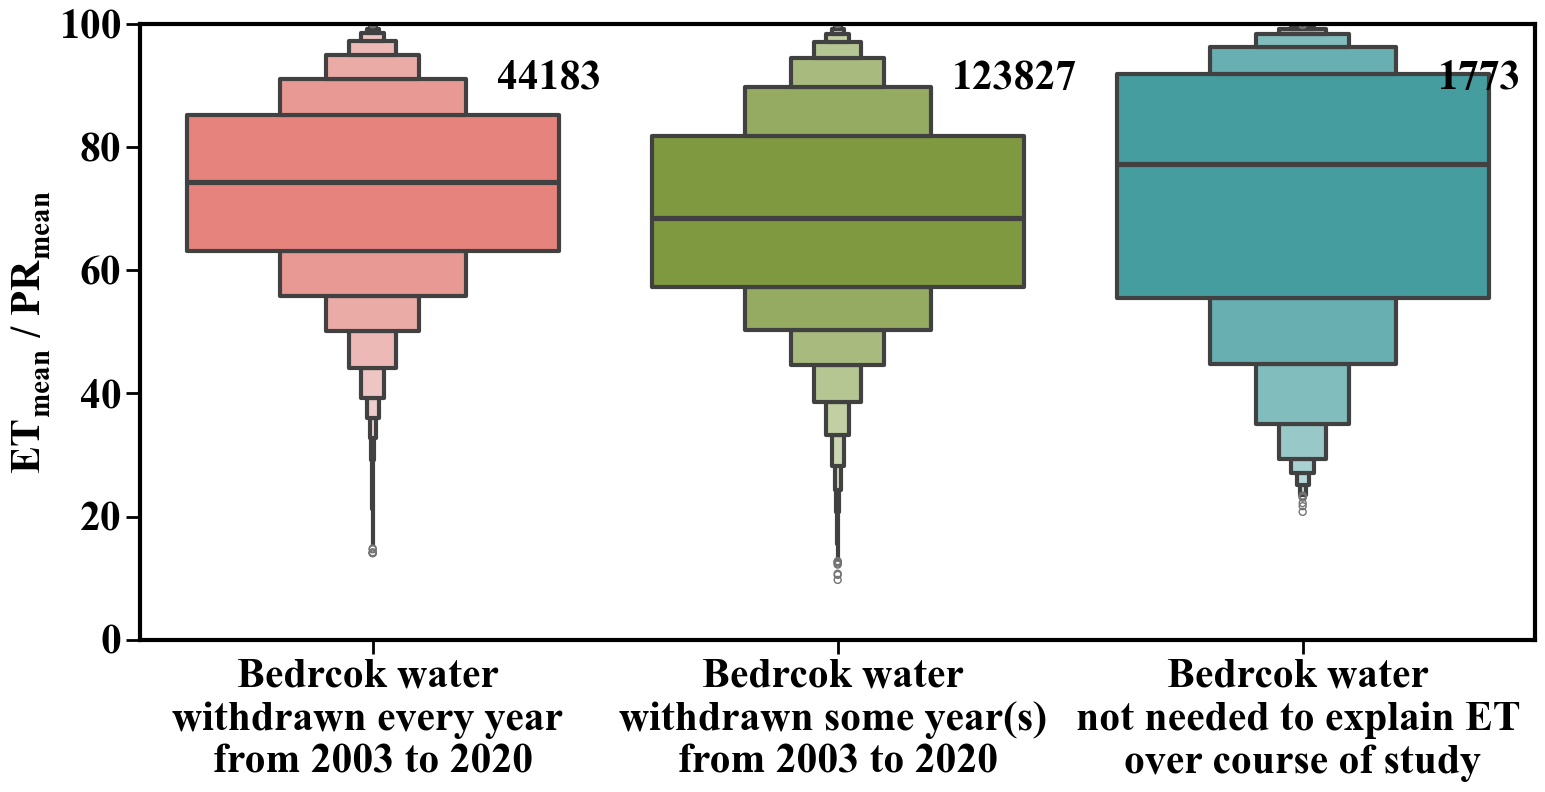

In [33]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/ET_mean_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.38, 88, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("$ET_{mean}$ / $PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

/tmp/ipykernel_3217072/461334942.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x147803fa39d0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

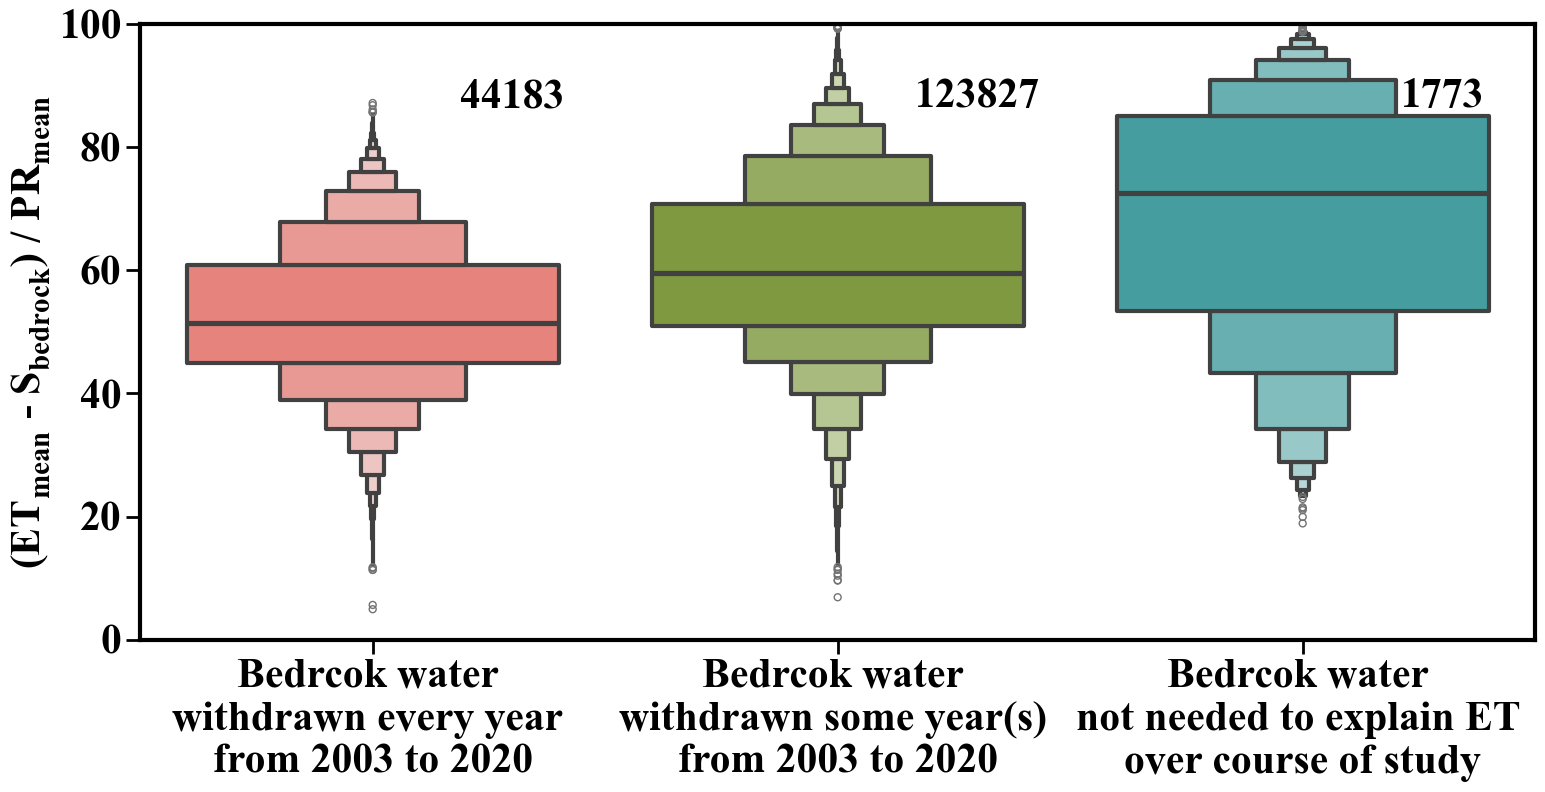

In [34]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/ET_mean_sub_Sbedrock_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("($ET_{mean}$ - $S_{bedrock}$) / $PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

/tmp/ipykernel_3217072/2699447323.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x14780804ff10>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

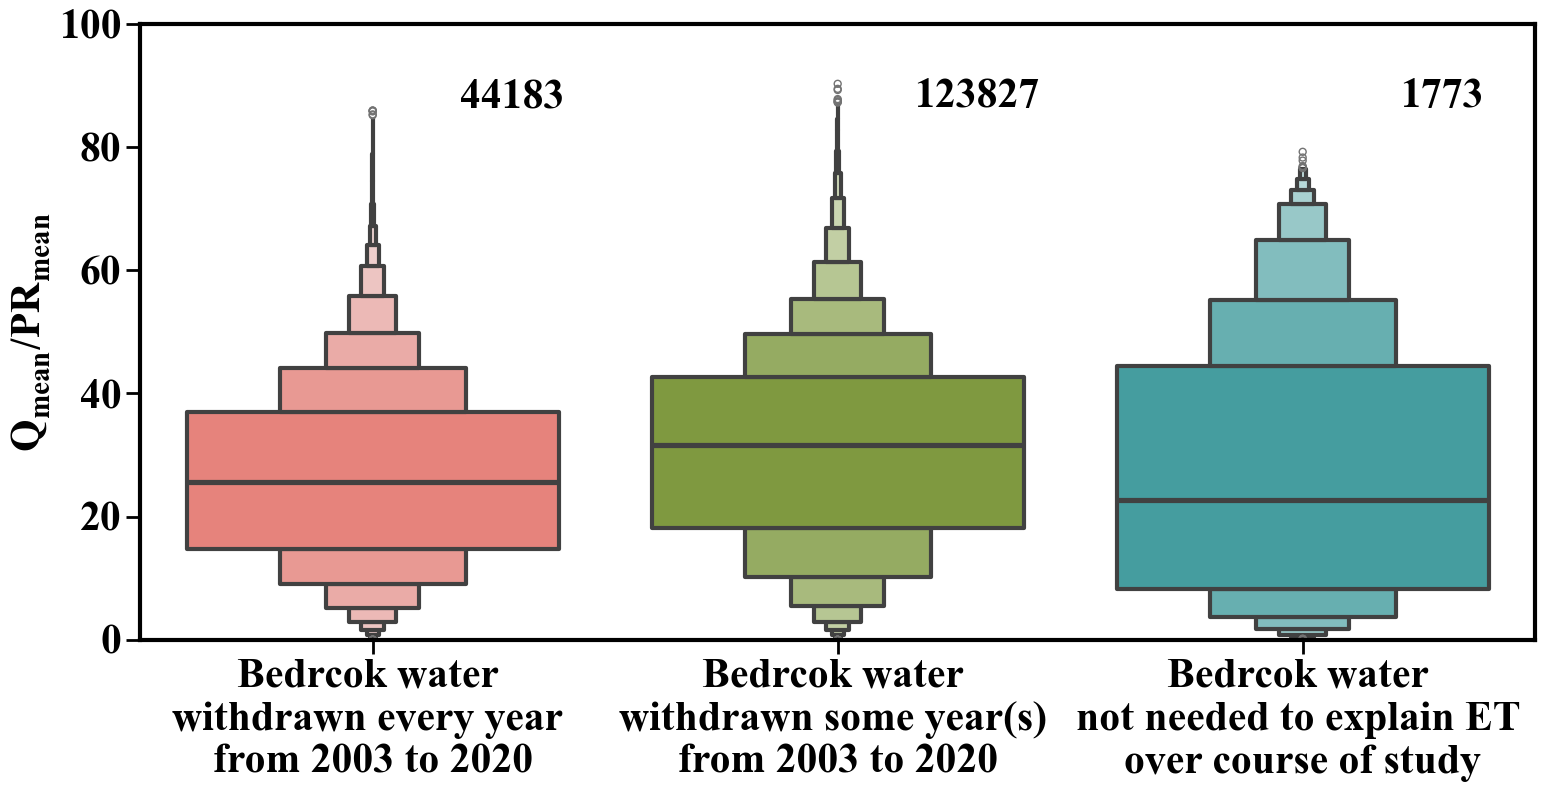

In [35]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/Q_mean_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("$Q_{mean}$/$PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

/tmp/ipykernel_3217072/3665674029.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x147803e2ad10>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

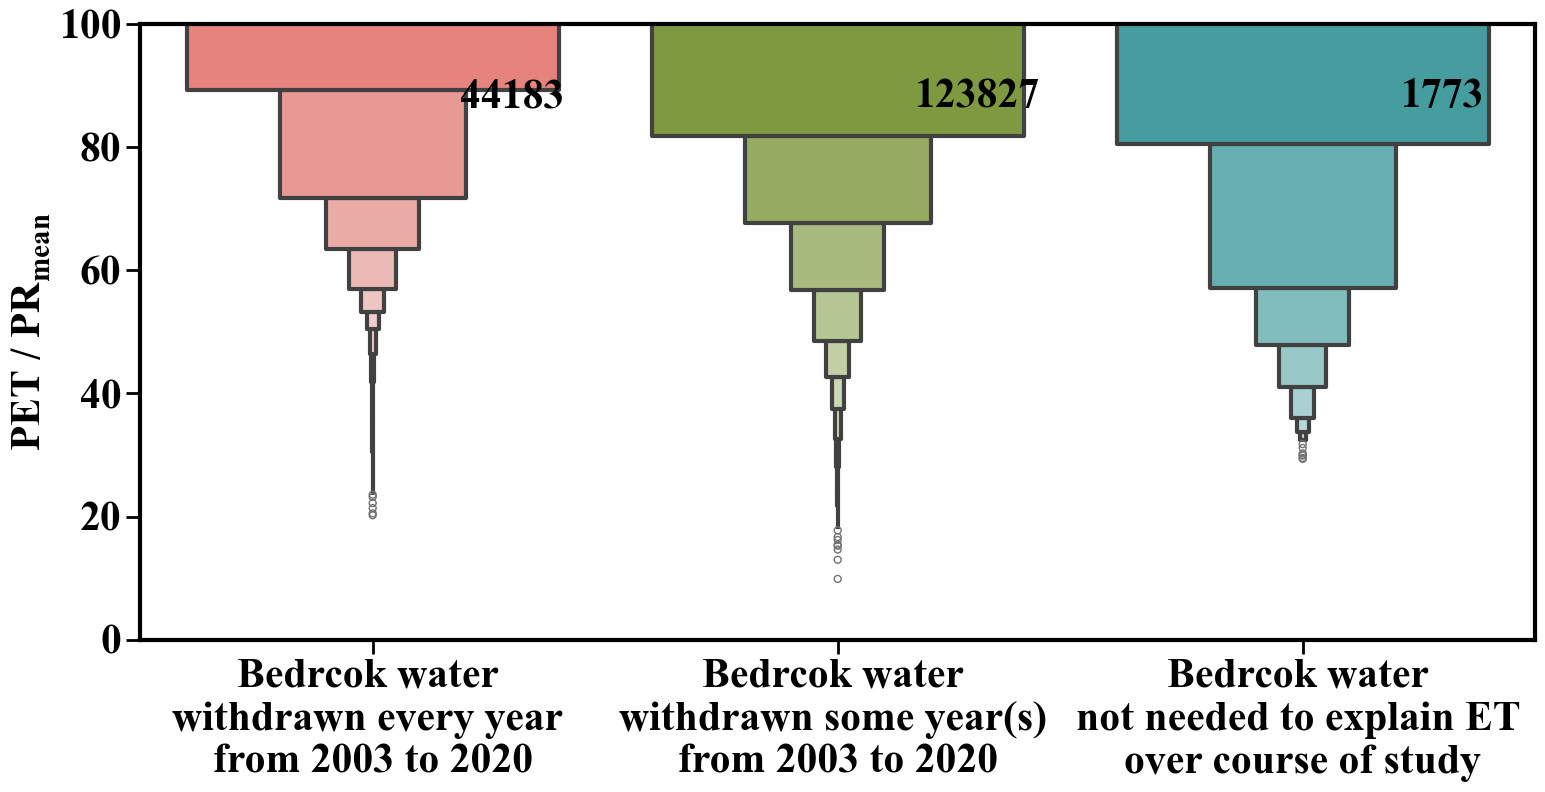

In [37]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/PET_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("PET / $PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')